In [1]:
import os
key = os.environ.get('AZURE_SEARCH_KEY')
print(key)

308d138070dd4298888faa108fe81216


In [2]:
print(key)

308d138070dd4298888faa108fe81216


In [3]:
from utils import search_images_bing

search_images_bing


<function utils.search_images_bing(key, term, min_sz=128, max_images=150)>

In [4]:
print(key)


308d138070dd4298888faa108fe81216


In [20]:
results = search_images_bing('4bc82f945240458098d7b2d08eb20f1d', 'christmas mug')
print(key)
ims = results.attrgot('contentUrl')
len(ims)

308d138070dd4298888faa108fe81216


150

In [19]:
print(results[0].keys())

dict_keys(['webSearchUrl', 'name', 'thumbnailUrl', 'datePublished', 'isFamilyFriendly', 'contentUrl', 'hostPageUrl', 'contentSize', 'encodingFormat', 'hostPageDisplayUrl', 'width', 'height', 'hostPageDiscoveredDate', 'thumbnail', 'imageInsightsToken', 'insightsMetadata', 'imageId', 'accentColor'])


In [44]:
from fastai.data.external import *
from fastai.data.transforms import *


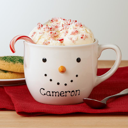

In [21]:
dest = 'images/mug_christmas.jpg'
download_url(ims[0], dest)
im = Image.open(dest)
im.to_thumb(128,128)

In [26]:
dir_n_search = {
    'christmas': 'christmas mug',
    'pottery': 'pottery mug',
    'kids': 'kids mug',
    'straw': 'mug with straw',
    'teacup': 'tea cup'
}

In [42]:
path = Path('00-mugs')
print(key)
if not path.exists():
    path.mkdir()
if True:
    for k, v in dir_n_search.items():
        print(f'{k} => {v}')
        dest = (path/k)
        dest.mkdir(exist_ok=True)
        results = search_images_bing('4bc82f945240458098d7b2d08eb20f1d', f'{v}')
        download_images(dest, urls=results.attrgot('contentUrl'))
    

308d138070dd4298888faa108fe81216
christmas => christmas mug
pottery => pottery mug
kids => kids mug
straw => mug with straw
teacup => tea cup


In [48]:
from fastai.data.transforms import *
fns = get_image_files(path)

In [49]:
fns

(#669) [Path('00-mugs/teacup/00000038.jpg'),Path('00-mugs/teacup/00000010.jpg'),Path('00-mugs/teacup/00000004.jpg'),Path('00-mugs/teacup/00000005.jpg'),Path('00-mugs/teacup/00000011.jpg'),Path('00-mugs/teacup/00000039.jpg'),Path('00-mugs/teacup/00000007.jpg'),Path('00-mugs/teacup/00000013.jpg'),Path('00-mugs/teacup/00000012.jpg'),Path('00-mugs/teacup/00000006.jpg')...]

In [50]:
failed = verify_images(fns)
failed

/Users/jdann/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7416. Skipping tag 37500
  "Possibly corrupt EXIF data.  "
/Users/jdann/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/PIL/TiffImagePlugin.py:772: UserWarning: Possibly corrupt EXIF data.  Expecting to read 7436 bytes but only got 7416. Skipping tag 37500
  "Possibly corrupt EXIF data.  "


(#3) [Path('00-mugs/christmas/00000103.jpg'),Path('00-mugs/pottery/00000083.jpg'),Path('00-mugs/kids/00000076.png')]

In [51]:
failed.map(Path.unlink)


(#3) [None,None,None]

In [52]:
len(fns)

669

In [56]:
?verify_images

Signature: verify_images(fns)
Docstring: Find images in `fns` that can't be opened
File:      ~/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/fastai/vision/utils.py
Type:      function


In [57]:
mugs = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128)
)

In [58]:
mugs

In [59]:
dls = mugs.dataloaders(path)

In [60]:
dls

In [61]:
?dls


Type:        DataLoaders
String form: <fastai.data.core.DataLoaders object at 0x7fe2d64925c0>
File:        ~/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/fastai/data/core.py
Docstring:   Basic wrapper around several `DataLoader`s.


In [62]:
??dls


Type:        DataLoaders
String form: <fastai.data.core.DataLoaders object at 0x7fe2d64925c0>
File:        ~/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/fastai/data/core.py
Source:     
class DataLoaders(GetAttr):
    "Basic wrapper around several `DataLoader`s."
    _default='train'
    def __init__(self, *loaders, path='.', device=None):
        self.loaders,self.path = list(loaders),Path(path)
        if device is not None or hasattr(loaders[0],'to'): self.device = device

    def __getitem__(self, i): return self.loaders[i]
    def new_empty(self):
        loaders = [dl.new(dl.dataset.new_empty()) for dl in self.loaders]
        return type(self)(*loaders, path=self.path, device=self.device)

    def _set(i, self, v): self.loaders[i] = v
    train   ,valid    = add_props(lambda i,x: x[i], _set)
    train_ds,valid_ds = add_props(lambda i,x: x[i].dataset)

    @property
    def device(self): return self._device

    @device.setter
    def device(self, d):
        for dl 

/Users/jdann/dev/study/fastai/fastai/venv/lib/python3.7/site-packages/PIL/Image.py:963: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


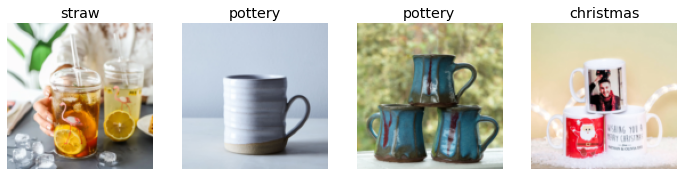

In [63]:
dls.valid.show_batch(max_n=4, nrows=1)

In [64]:
mugs2 = mugs.new(item_tfms=RandomResizedCrop(224, min_scale=0.5),
                batch_tfms=aug_transforms())
dls = mugs2.dataloaders(path)

In [65]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /Users/jdann/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1056)>